In [32]:
 !pip install -q ipython-autotime
 %load_ext autotime

time: 659 µs (started: 2023-11-30 04:04:19 +00:00)


In [33]:
!gdown 1prPMgqX6TC31LNA-cz4-a1YOm2sHJzwj

Downloading...
From: https://drive.google.com/uc?id=1prPMgqX6TC31LNA-cz4-a1YOm2sHJzwj
To: /content/data_iqr.csv
100% 220k/220k [00:00<00:00, 82.9MB/s]
time: 1.72 s (started: 2023-11-30 04:04:29 +00:00)


In [34]:
import pandas                as pd
import numpy                 as np
import matplotlib.pyplot     as plt
import seaborn               as sbn
import warnings
warnings.filterwarnings('ignore') # tắt những cảnh báo

###############################################################################

from sklearn.preprocessing   import OneHotEncoder
from sklearn.preprocessing   import LabelEncoder
from sklearn.preprocessing   import StandardScaler

###############################################################################

from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LinearRegression

###############################################################################

from sklearn.metrics         import mean_squared_error, r2_score

time: 6.7 ms (started: 2023-11-30 04:04:31 +00:00)


In [35]:
df = pd.read_csv('/content/data_iqr.csv')
df.head()

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,Yes,Travel_Rarely,1102,Sales,1.0,2,Life Sciences,2,...,3,1,0,8,1,1,6,4,0,5
1,1,49,No,Travel_Frequently,279,Research & Development,8.0,1,Life Sciences,3,...,4,4,1,10,3,3,10,7,1,7
2,2,37,Yes,Travel_Rarely,1373,Research & Development,2.0,2,Other,4,...,3,2,0,7,3,3,1,0,0,0
3,3,33,No,Travel_Frequently,1392,Research & Development,3.0,4,Life Sciences,4,...,3,3,0,8,3,3,8,7,3,0
4,4,27,No,Travel_Rarely,591,Research & Development,2.0,1,Medical,1,...,3,4,1,6,3,3,2,2,2,2


time: 99.8 ms (started: 2023-11-30 04:04:31 +00:00)


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1470 non-null   object 
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   float64
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EnvironmentSatisfaction   1470 non-null   int64  
 10  Gender                    1470 non-null   object 
 11  HourlyRate                1470 non-null   float64
 12  JobInvolvement            1470 non-null   int64  
 13  JobLevel                  1470 non-null   int64  
 14  JobRole 

# Preprocessing

In [37]:
le = LabelEncoder()

for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = le.fit_transform(df[i])

time: 11.7 ms (started: 2023-11-30 04:04:31 +00:00)


In [38]:
df.tail()

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,1472,36,0,1,884,1,23.0,2,3,3,...,3,3,1,17,3,3,5,2,0,3
1466,1473,39,0,2,613,1,6.0,1,3,4,...,3,1,1,9,5,3,7,7,1,7
1467,1474,27,0,2,155,1,4.0,3,1,2,...,4,2,1,6,1,3,6,2,0,3
1468,1475,49,0,1,1023,2,2.0,3,3,4,...,3,4,0,17,3,2,9,6,0,8
1469,1476,34,0,2,628,1,7.0,3,3,2,...,3,1,0,6,3,4,4,3,1,2


time: 41.1 ms (started: 2023-11-30 04:04:31 +00:00)


In [39]:
scaler = StandardScaler()
features = df.drop('Attrition',axis=1)
scaled_data = scaler.fit_transform(df)

time: 13.5 ms (started: 2023-11-30 04:04:31 +00:00)


In [40]:
df_scaled = pd.DataFrame(scaled_data)

X = df_scaled
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

time: 6.07 ms (started: 2023-11-30 04:04:31 +00:00)


In [41]:
! mkdir figs

mkdir: cannot create directory ‘figs’: File exists
time: 132 ms (started: 2023-11-30 04:04:31 +00:00)


# Máy học

## Linear Regression

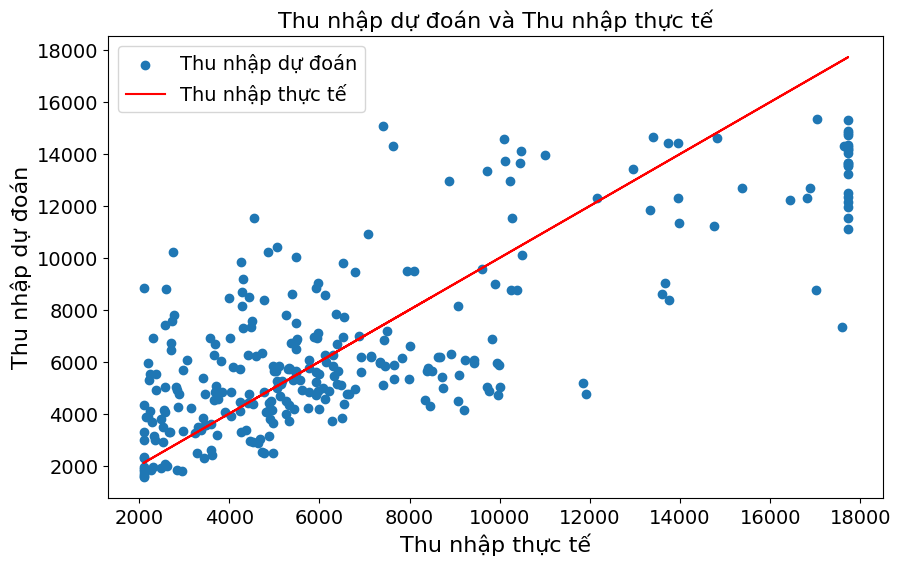

time: 1.23 s (started: 2023-11-30 04:04:31 +00:00)


In [42]:
selected_features = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'NumCompaniesWorked',
                     'PercentSalaryHike', 'PerformanceRating', 'TotalWorkingYears', 'TrainingTimesLastYear',
                     'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
                     'MonthlyIncome']

subset_df = df[selected_features].dropna()

X = subset_df.drop('MonthlyIncome', axis=1)
y = subset_df['MonthlyIncome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

plt.figure(figsize=(10, 6))

plt.scatter(y_test, predictions, label='Thu nhập dự đoán')
plt.plot(y_test, y_test, color='red', label='Thu nhập thực tế')

plt.xlabel('Thu nhập thực tế', fontsize=16)
plt.ylabel('Thu nhập dự đoán', fontsize=16)
plt.title('Thu nhập dự đoán và Thu nhập thực tế', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.savefig('figs/linear_regression.pdf')
plt.show()

In [43]:
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

MSE: 8015332.449704925
RMSE: 2831.1362471108528
R2 Score: 0.5913591731796117
time: 7.09 ms (started: 2023-11-30 04:04:33 +00:00)


In [44]:
X_train_np = X_train.values
y_train_np = y_train.values

X_train_np = np.c_[np.ones(X_train_np.shape[0]), X_train_np]

theta = np.linalg.inv(X_train_np.T.dot(X_train_np)).dot(X_train_np.T).dot(y_train_np)

print("Coefficients:", theta)

Coefficients: [ 3.46709368e+03 -2.49369388e+01  7.93184100e-02 -1.10664194e+01
 -4.49263025e+00 -3.84181651e+01  2.79621178e+01 -5.41542170e+02
  4.92096977e+02  2.88099342e+01  1.05108119e+02 -4.05905332e+01
  5.79682946e+01 -1.56105760e+02]
time: 4.37 ms (started: 2023-11-30 04:04:33 +00:00)


In [45]:
X_test_np = X_test.values
X_test_np = np.c_[np.ones(X_test_np.shape[0]), X_test_np]
y_pred = X_test_np.dot(theta)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

MSE: 8015332.449704945
RMSE: 2831.1362471108564
R2 Score: 0.5913591731796106
time: 3.39 ms (started: 2023-11-30 04:04:33 +00:00)


In [46]:
!zip -r figs.zip figs
from google.colab import files
files.download('figs.zip')

updating: figs/ (stored 0%)
updating: figs/linear_regression.pdf (deflated 22%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

time: 36 ms (started: 2023-11-30 04:04:33 +00:00)
